# Week 3

## Review: matplotlib subplots

In [1]:
import matplotlib.pyplot as plt

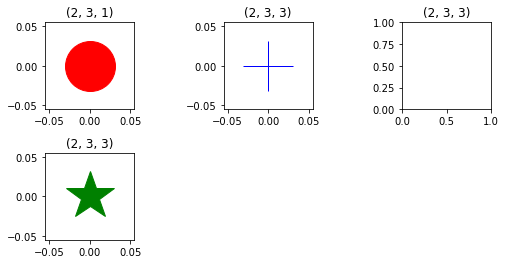

In [2]:
plt.figure(figsize=(8, 4))
plt.subplots_adjust(hspace=0.5, wspace=1)

plt.subplot(2, 3, 4)
plt.plot(0, 0, 'g*', ms=50)
plt.title("(2, 3, 3)")

plt.subplot(2, 3, 1)
plt.plot(0, 0, 'ro', ms=50)
plt.title("(2, 3, 1)")

plt.subplot(2, 3, 2)
plt.plot(0, 0, 'b+', ms=50)
plt.title("(2, 3, 3)")

plt.subplot(2, 3, 3)
plt.title("(2, 3, 3)");

plt.show()



## Sidenote: ipywidgets and interact

In [3]:
from ipywidgets import interact, fixed

def multiply(a, b):
    return a*b

interact(multiply, a=(1, 20), b=(1,10));

interactive(children=(IntSlider(value=10, description='a', max=20, min=1), IntSlider(value=5, description='b',…

In [4]:
interact(multiply, a=(1, 20), b=fixed(10));

interactive(children=(IntSlider(value=10, description='a', max=20, min=1), Output()), _dom_classes=('widget-in…

In [5]:
import numpy as np

def f(n, color, sin, cos):
    
    x = np.linspace(0, 7, 100)
    if sin:
        plt.plot(x, np.sin(n*x), '--', color=color)
    if cos:
        plt.plot(x, np.cos(n*x), '-', color=color)   
    plt.show()

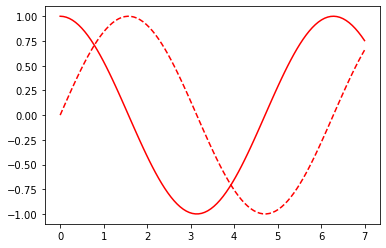

In [6]:
f(n=1, color='r', sin=True, cos=True)

In [7]:
interact(f, n=(1, 10), color=['r', 'b', 'g'], sin=True, cos=True);

interactive(children=(IntSlider(value=5, description='n', max=10, min=1), Dropdown(description='color', option…

## Types of machine learning:

* Supervised learning:
  - **Input:** training data with labels
  - **Goal:** predict labels for new, unlabeled data
  - **Main types:** classification, regression 
  
  
 * Unsupervised learning
  - **Input:** unlabeled data
  - **Goal:** find some patterns in data, simplify data, organize data ...
  - **Some types:** clustering, density estimation, anomaly detection, dimensionality reduction


## Clustering

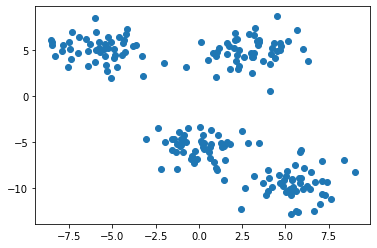

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, 
                  n_features=2, 
                  centers=4, 
                  cluster_std=1.5, 
                  random_state=10
                 )

plt.scatter(X[:, 0], X[:, 1]);

* Centroid based clustering
* Centroid-based clustering is not always the right one:

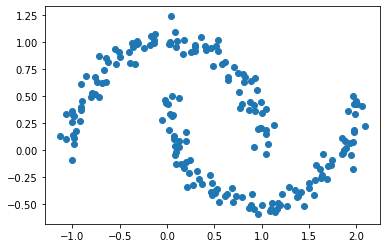

In [9]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.07)
plt.scatter(X[:, 0], X[:, 1]);

## k-Means

**Note:** With this algorithm we need to specify how many clusters we want to obtain. 

* **Step 0** select `n` data points as initial cluster centroids. 
* **Step 1** assign data points to clusters based on which centroid is the closest to the given point. 
* **Step 2** compute new cluster centroids as averages of points in each cluster

Repeat steps 1 and 2 until cluster centroids are not changing anymore. 

In [10]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def get_distances(X, Y):
    """
    Given 2-dimensional numpy arrays X and Y
    returns a 2-dimensional array whose (i, j)-entry
    is the square of the Euclidean distance between
    the i-th row of X and the j-th row of Y
    """

    return np.sum((X[:, np.newaxis, :] - Y[np.newaxis, :, :])**2, axis=-1)


def kmeans(X, n):
    """
    Implements the k-mneans algorithm.

    X:
        2-dimensional numpy array whose rows are coordinates of data points.
    n:
        Integer, the number of clusters.

    Returns:
        A list of tuples (labels, centers), one tuple for each iteration step.
        labels is a 1-dimensional array with labels od points in X, centers is
        a 2-dimensional array with coordinates of centroids of clusters.
        The last tuple on the list is the clustering final result.
    """

    X = X.copy()
    h = X.shape[0]
    centers = X[np.random.choice(h, size=n, replace=False)]

    new_centers = np.zeros_like(centers)

    steps = []
    while True:
        d = get_distances(X, centers)
        labels = np.argmin(d, axis=1)
        steps.append((labels, centers))
        for j in range(n):
            new_centers[j] = np.mean(X[labels == j], axis=0)
        if np.array_equal(centers, new_centers):
            break
        else:
            centers = new_centers.copy()
    return steps


def plot_clusters(X, labels=None, centers=None):
    """
    Plots clusters and their centoids.

    X:
        2-dimensional numpy array whose rows are coordinates of data points.
    labels:
        1-dimensional numpy array with labels of points in X.
    centers:
        2-dimensional numpy array whose rows are coordinates of cluster
        centroids.
    """

    if labels is not None:
        n = len(set(labels))
    else:
        n = 1
    colors = ListedColormap(
        ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple'][:n])
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, marker="+", cmap=colors)
    if centers is not None:
        plt.scatter(centers[:, 0],
                    centers[:, 1],
                    c=range(centers.shape[0]),
                    s=250,
                    linewidths=3,
                    edgecolors="k",
                    cmap=colors)
    plt.show()


def plot_iteration(X, steps, k=0):
    """
    Plots clusters computed by a given iteration of k-means.

    X:
        2-dimensional numpy array whose rows are coordinates of data points.
    steps:
        A list with cluster data produced by the kmeans function.
    k:
        An index of the steps list
    """

    plot_clusters(X, steps[k][0], steps[k][1])

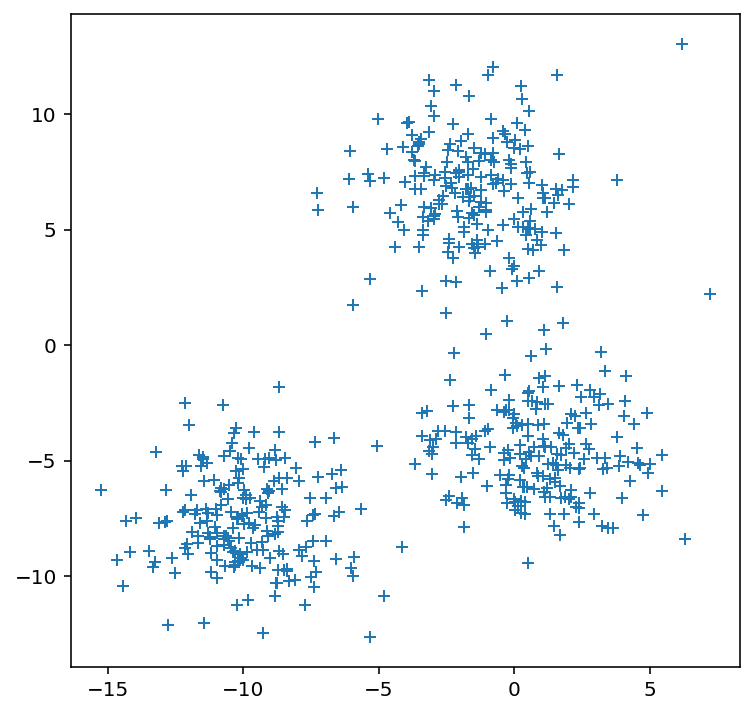

In [11]:
X, y = make_blobs(n_samples=600,
                  n_features=2,
                  centers=3,
                  cluster_std=2, 
                  random_state=100
                 )
plt.figure(figsize=(6,6))
plt.plot(X[:, 0], X[:, 1], "+");

In [12]:
n=3
steps = kmeans(X, 3)

In [13]:
steps[1]

(array([2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1,
        0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2,
        2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2,
        1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2,
        2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0,
        2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
        0, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1,
        2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1,
        2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1,
        0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1,
        0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 

In [14]:
len(steps)

5

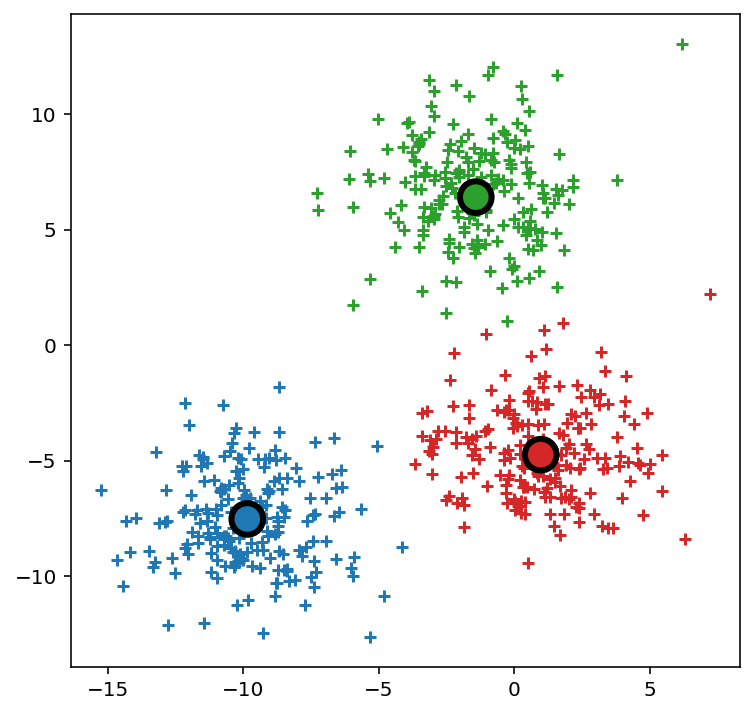

In [15]:
plot_iteration(X, steps, k=2)

In [16]:
X, y = make_blobs(n_samples=600,
                  n_features=2,
                  centers=3,
                  cluster_std=1.5, 
                  #random_state=100
                 )

steps = kmeans(X, 3)

interact(plot_iteration, X=fixed(X), steps=fixed(steps), k=(0, len(steps)-1));

interactive(children=(IntSlider(value=0, description='k', max=3), Output()), _dom_classes=('widget-interact',)…

In [17]:
X, y = make_moons(n_samples=200, noise=0.07)
steps = kmeans(X, 2)

interact(plot_iteration, X=fixed(X), steps=fixed(steps), k=(0, len(steps)-1));

interactive(children=(IntSlider(value=0, description='k', max=7), Output()), _dom_classes=('widget-interact',)…

## K-means with sklearn

In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init="k-means++")
km

KMeans(n_clusters=3)

In [19]:
X, y = make_blobs(n_samples=600,
                  n_features=2,
                  centers=3,
                  cluster_std=1.5, 
                  random_state=100
                 )

X, y

(array([[ -2.90852337,   5.88517581],
        [ -8.14220866,  -6.84907327],
        [  0.04981016,   5.49906817],
        ...,
        [ -3.59187438,  -4.38263638],
        [ -3.03135625,   8.20234667],
        [-10.13135497,  -8.90055929]]),
 array([1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0,
        2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0,
        1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2,
        0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1,
        0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2,
        0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 1,
        1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2,
        1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2,
        2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 0,
        1, 1, 1, 

In [20]:
km.fit(X)

KMeans(n_clusters=3)

In [21]:
km.labels_

array([0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 2,
       0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1,
       0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2,
       0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2,
       1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 2,
       1, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0,

In [22]:
km.cluster_centers_

array([[-1.52178358,  6.76079726],
       [-9.88845179, -7.54260416],
       [ 0.91160521, -4.46687065]])

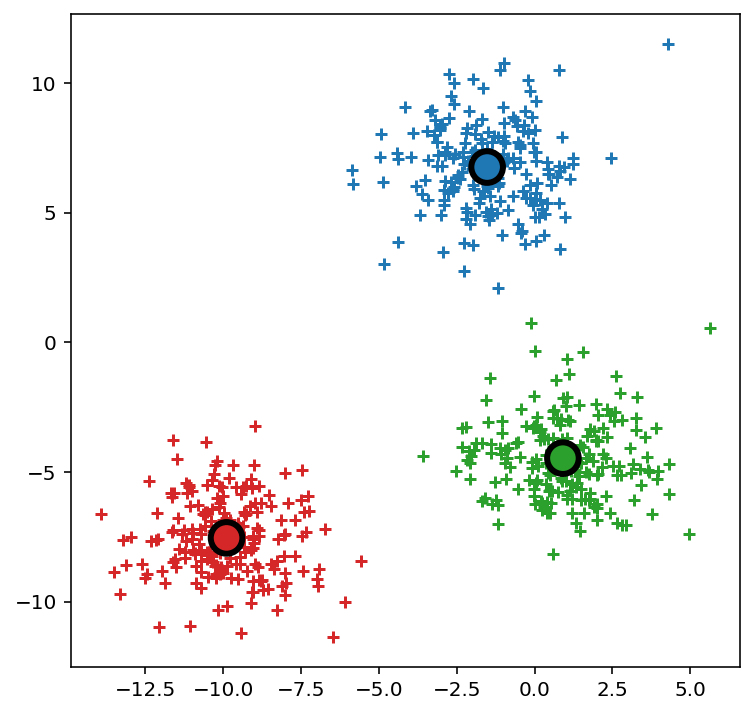

In [23]:
plot_clusters(X, km.labels_, km.cluster_centers_)

## k-NN with sklearn

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [26]:
X, y = make_blobs(n_samples=600,
                  n_features=2,
                  centers=3,
                  cluster_std=3, 
                  random_state=100
                 )

knn.fit(X, y)
knn

KNeighborsClassifier()

In [27]:
p = [[1, 0]]
arr = np.array(p).reshape(1, 2)
arr

array([[1, 0]])

In [28]:
label = knn.predict(arr)
label

array([0])

In [29]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize


def plot_clusters(X, y, p=None, p_label=None, neighbors=None):
    """
    Plots nearest neighbors of a given point.

    X:
        A 2-dimensional numpy array with coordinates
        of points in clusters
    y:
        A 1-dimensional numpy array with labels of points
    p:
        An array with coordinates of the point whose
        neighbors will be plotted.
    p_label:
        The predicted label of the point p.
    neighbors:
        A list of row numbers of X which are the nearest
        neighbors of the point p.
    """

    # build a custom colormap
    col_list = ['dodgerblue', 'limegreen', 'red', 'orange', 'fuchsia']
    colors = ListedColormap(col_list)
    norm = Normalize(0, len(col_list))

    plt.figure(figsize=(8, 8))
    with plt.style.context('seaborn'):
        scatter = plt.scatter(X[:, 0],
                              X[:, 1],
                              c=y,
                              s=90,
                              cmap=colors,
                              norm=norm,
                              label=y)
        if p is not None:
            p_col = "k" if p_label is None else colors(norm(p_label))
            plt.plot(p[0], p[1], marker="*", mfc=p_col, mec="k", ms=30, mew=2)
        if neighbors is not None:
            plt.scatter(X[neighbors, 0],
                        X[neighbors, 1],
                        edgecolors='black',
                        linewidth=3,
                        facecolors="None",
                        s=300)
        plt.legend(*scatter.legend_elements(),
                   markerscale=1.5,
                   prop={
                       "size": 12,
                       "weight": "normal"
                   })
    plt.show()

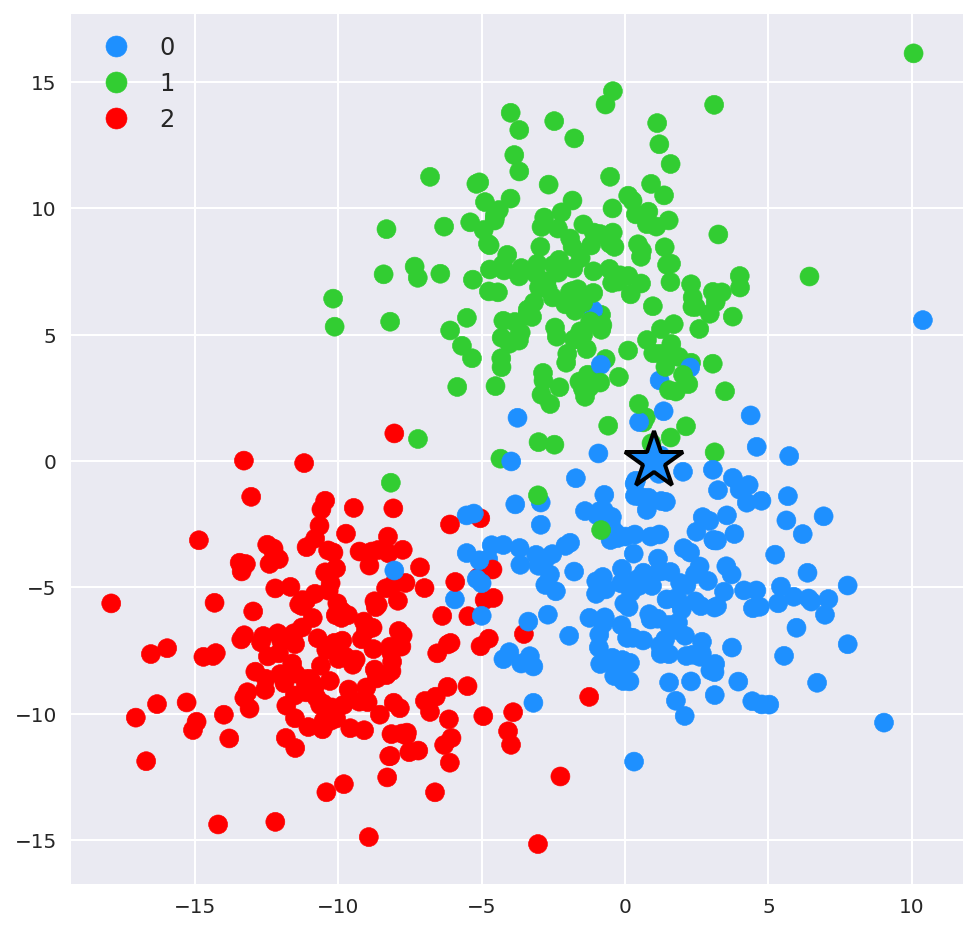

In [30]:
plot_clusters(X, y, p=[1, 0], p_label=0)

In [31]:
X, y = make_blobs(n_samples=600,
                  n_features=2,
                  centers=4,
                  cluster_std=3, 
                  random_state=100
                 )

N = 500
train_X = X[:N]
train_y = y[:N]

test_X = X[N:]
test_y = y[N:]

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y )

KNeighborsClassifier()

In [33]:
predictions = knn.predict(test_X)
predictions

array([2, 3, 0, 2, 3, 3, 3, 1, 0, 1, 2, 0, 1, 3, 1, 2, 1, 1, 0, 1, 0, 2,
       1, 3, 0, 2, 3, 2, 0, 0, 1, 3, 2, 1, 1, 1, 1, 1, 3, 0, 1, 2, 3, 0,
       2, 0, 0, 0, 1, 0, 3, 1, 0, 1, 2, 0, 3, 0, 0, 0, 1, 3, 2, 3, 1, 1,
       3, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 3, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 1, 3, 0, 2, 0, 3, 0, 1, 0])

In [34]:
test_y

array([2, 3, 0, 2, 1, 3, 1, 1, 0, 3, 2, 0, 1, 3, 3, 2, 1, 1, 0, 1, 0, 2,
       1, 1, 0, 2, 3, 2, 3, 0, 1, 3, 2, 1, 1, 1, 1, 3, 1, 0, 3, 2, 3, 0,
       2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 3, 0, 0, 0, 1, 3, 2, 3, 3, 3,
       3, 0, 1, 3, 2, 1, 3, 1, 0, 0, 2, 1, 3, 3, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 1, 3, 0, 2, 0, 1, 0, 3, 0])

In [35]:
predictions ==  test_y

array([ True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True])

In [36]:
(predictions ==  test_y).sum()

82

In [37]:
(predictions ==  test_y).sum()/len(predictions)

0.82

In [38]:
confusion = np.zeros((4, 4), dtype=int)
confusion

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [39]:
for lab, pred in zip(test_y, predictions):
    confusion[lab, pred] += 1
confusion

array([[27,  1,  0,  0],
       [ 0, 25,  0,  6],
       [ 0,  0, 18,  0],
       [ 3,  8,  0, 12]])

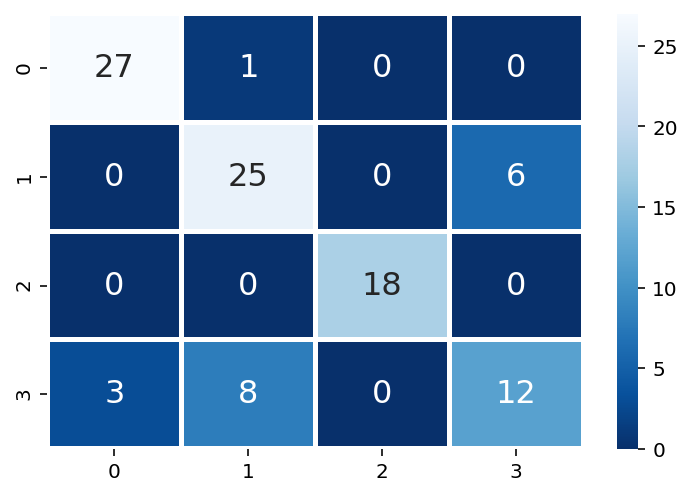

In [40]:
import seaborn as sns

sns.heatmap(confusion,
            cmap = "Blues_r",
            annot=True,
            annot_kws={"fontsize":16},
            linewidth=2, 
           );

## Clustering colors

In [41]:
pwd

'/Users/bb/Documents/GitHub/MTH548/preps/week_3'

In [42]:
ls

butterfly.jpg      tiger.jpg          week_3.ipynb
peppers.jpg        town.jpg           week_3_prep.ipynb


In [4]:
a = np.random.randint(0, 100, (4, 4))
a

array([[76, 95, 83, 58],
       [90, 48, 41, 38],
       [ 8, 81, 30, 56],
       [19, 86, 73, 40]])

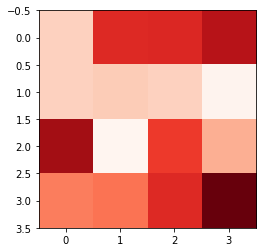

In [3]:
plt.imshow(a, cmap="Reds")

In [5]:
b = np.random.randint(0, 255, (4, 4, 3))
b

array([[[ 31,   7, 163],
        [171,   7, 224],
        [106,  87,  91],
        [199, 186, 209]],

       [[ 99, 201, 206],
        [228, 212,  21],
        [ 36, 254,   5],
        [219,  85, 224]],

       [[236, 243,  56],
        [171, 187, 126],
        [107, 191, 111],
        [191, 160, 109]],

       [[126, 123,  34],
        [135, 203, 199],
        [244, 250,  45],
        [225, 180,  29]]])

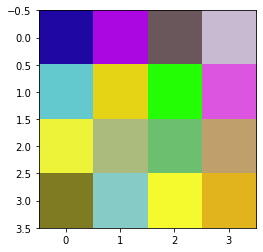

In [6]:
plt.imshow(b)

In [47]:
tiger = plt.imread("tiger.jpg")
tiger

array([[[243, 224, 194],
        [242, 223, 193],
        [236, 217, 187],
        ...,
        [241, 218, 184],
        [245, 222, 188],
        [250, 227, 193]],

       [[246, 229, 199],
        [246, 229, 199],
        [241, 224, 194],
        ...,
        [247, 224, 190],
        [252, 229, 195],
        [252, 229, 195]],

       [[249, 232, 204],
        [251, 234, 206],
        [249, 232, 204],
        ...,
        [253, 230, 198],
        [255, 233, 201],
        [248, 225, 193]],

       ...,

       [[254, 251, 244],
        [254, 251, 244],
        [254, 251, 244],
        ...,
        [254, 247, 237],
        [254, 247, 237],
        [254, 247, 237]],

       [[254, 251, 244],
        [254, 251, 244],
        [254, 251, 244],
        ...,
        [254, 247, 237],
        [254, 247, 237],
        [254, 247, 237]],

       [[254, 251, 244],
        [254, 251, 244],
        [254, 251, 244],
        ...,
        [254, 247, 237],
        [254, 247, 237],
        [254, 247, 237]]

In [48]:
tiger.shape

(644, 1000, 3)

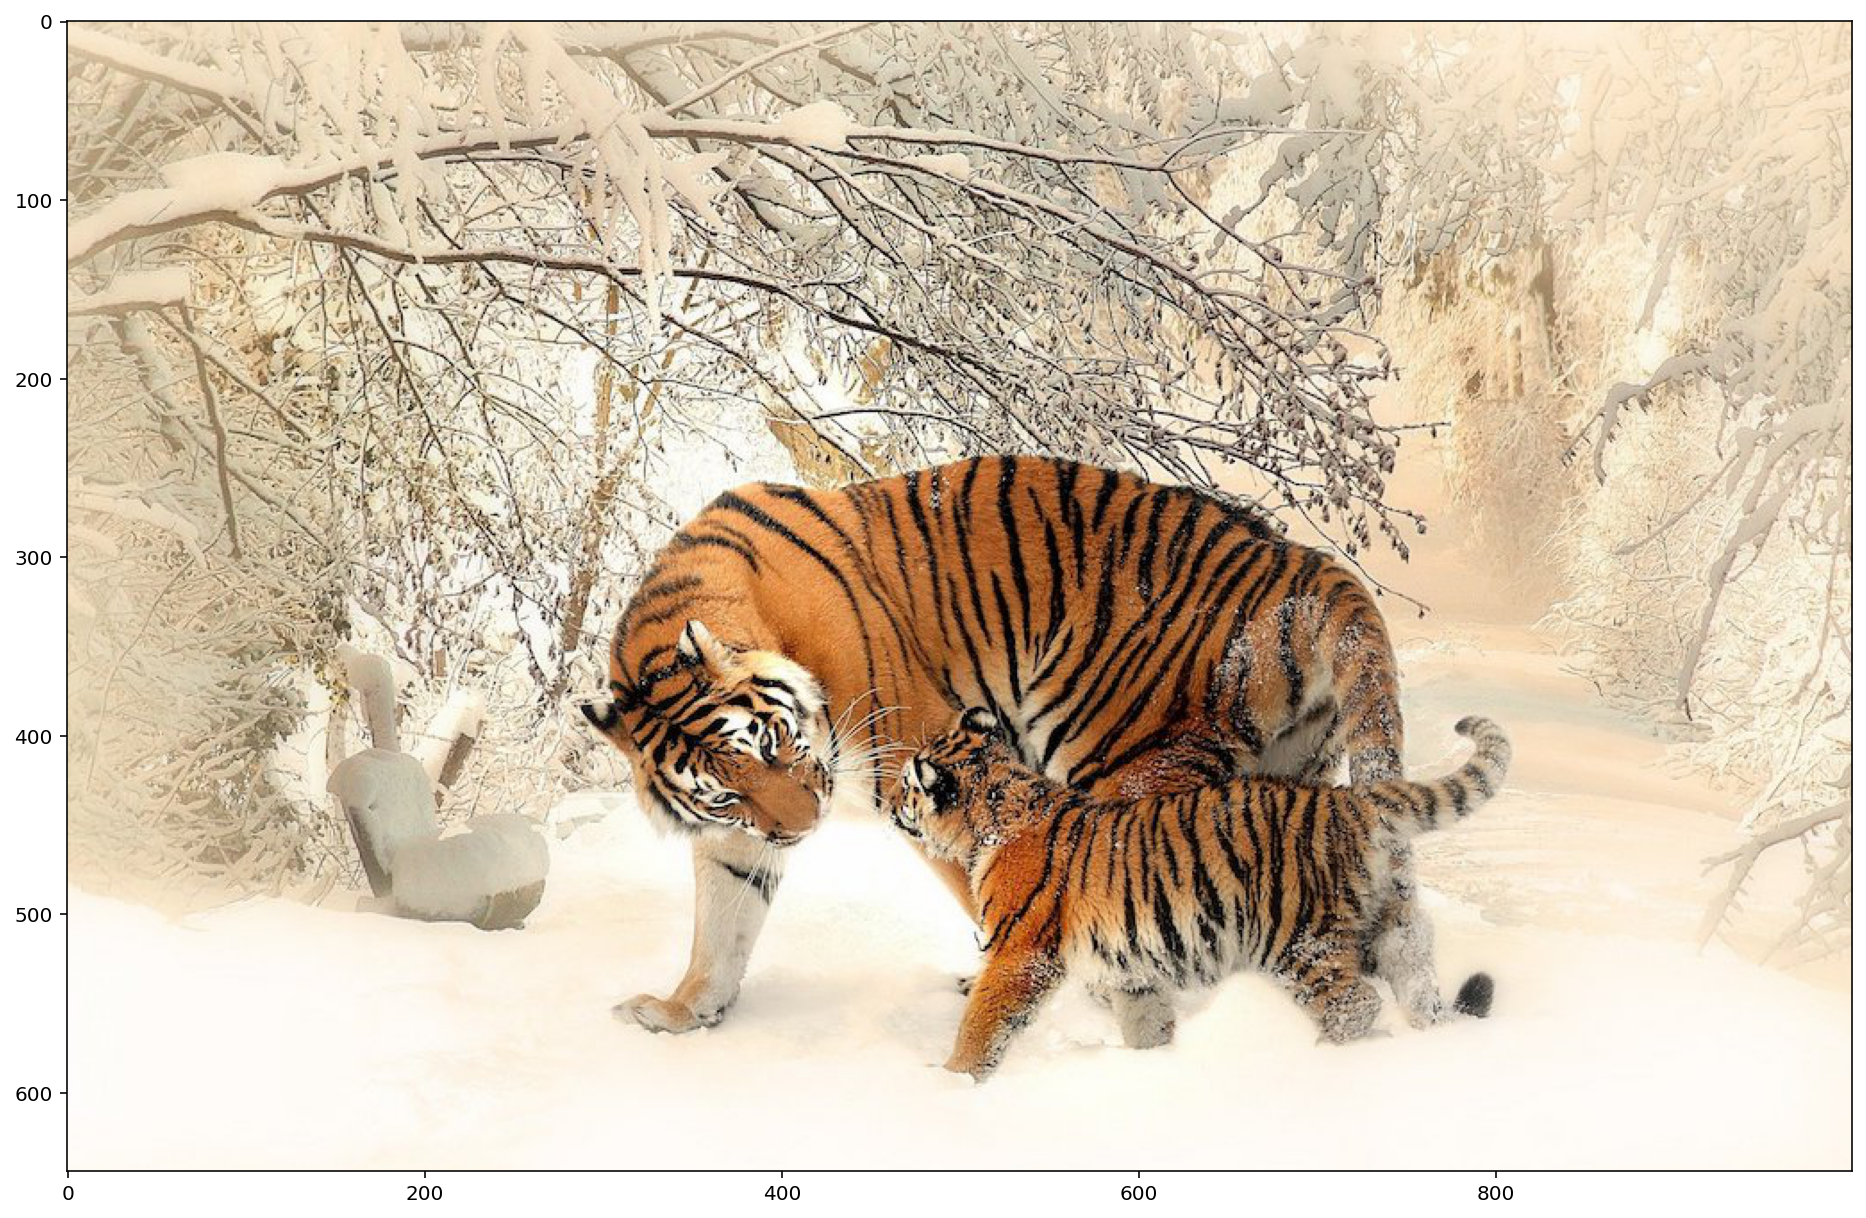

In [49]:
plt.figure(figsize=(16,16))
plt.imshow(tiger)

In [50]:
tiger2d = tiger.reshape( -1, 3)
tiger2d

array([[243, 224, 194],
       [242, 223, 193],
       [236, 217, 187],
       ...,
       [254, 247, 237],
       [254, 247, 237],
       [254, 247, 237]], dtype=uint8)

In [51]:
tiger2d.shape

(644000, 3)

In [52]:
np.unique(tiger2d, axis=0).shape

(85796, 3)